# 🔴 Práctica 03: Exploradores de laberinto 🏟️

----

<b>Team:</b> <font color='red'>S</font><b>ocios</b> <font color='blue'>I</font><b>nteligentemente</b> <font color='green'>A</font><b>rtificiales</b> (<font color='red'>S</font>.<font color='blue'>I</font>.<font color='green'>A</font>)


<font color='red'>✪</font> Bonilla Reyes Dafne

<font color='red'>✪</font> Castañón Maldonado Carlos Emilio

<font color='red'>✪</font> Mares Cruz Tlacaelel Horacio

<font color='red'>✪</font> Maya Castrejón Luis Manuel

<font color='red'>✪</font> Navarro Santana Pablo César



----

<div style="text-align: center"> 

[![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExendwNm0xdzcxZnV2Ym56cXRlOXlldDdyOTRwMmpmNnlsam0zMXdtaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/DdmrOg4Z4tndBRAtM3/giphy-downsized.gif)](https://www.youtube.com/watch?v=YRvOePz2OqQ)

</div>


### 📌 **Definimos la Clase Agente**

<div style="text-align: justify"> 

El agente tiene que explorar el laberinto y encontrar la salida. Al crearlo, solo le damos su posición inicial en el laberinto, como si estuviera parado en la entrada, mirando hacia adentro, preguntándose qué le depara el destino.

Tiene que moverse pero no puede simplemente moverse como sea debe evitar obstáculos. Le decimos en qué dirección ir ("arriba", "abajo", "izquierda", "derecha"), y él verifica si el camino está libre. Si encuentra un muro (un obstáculo representado por un 1), sabe que debe detenerse y pensar en otro camino.

</div>

In [213]:
class Agente:
    def __init__(self, posicion):
        """
        Inicializa un objeto Agente con una posición dada.

        Args:
            posicion (list): La posición inicial del agente en forma de lista [x, y].
        """
        self.posicion = posicion

    def mover(self, direccion, laberinto):
        """
        Mueve el agente en la dirección especificada si es un movimiento válido.

        Args:
            direccion (str): La dirección en la que se desea mover el agente ("arriba", "abajo", "izquierda", "derecha").
            laberinto (list): El laberinto en forma de matriz.

        Returns:
            list or None: La nueva posición del agente si el movimiento es válido, None en caso contrario.
        """
        x, y = self.posicion
        # Mueve el agente arriba si no es límite superior, y donde la celda destino no es un obstáculo.
        if direccion == "arriba" and x > 0 and laberinto[x-1][y] != 1:
            self.posicion = [x-1, y]
        # Mueve el agente abajo si no es límite inferior, y donde la celda destino no es un obstáculo.
        elif direccion == "abajo" and x < len(laberinto) - 1 and laberinto[x+1][y] != 1:
            self.posicion = [x+1, y]
        # Mueve el agente izquierda si no es límite izquierdo, y donde la celda destino no es un obstáculo.
        elif direccion == "izquierda" and y > 0 and laberinto[x][y-1] != 1:
            self.posicion = [x, y-1]
        # Mueve el agente derecha si no es límite derecho, y donde la celda destino no es un obstáculo. 
        elif direccion == "derecha" and y < len(laberinto[0]) - 1 and laberinto[x][y+1] != 1:
            self.posicion = [x, y+1]
        else:
            return None
        
        return self.posicion

#### ➡️ **Flechas**

<div style="text-align: justify"> 

Mientras nuestro agente explora, vamos a dejar un rastro de su viaje. Para eso utilizamos la función flechas. Cada vez que el Agente toma una decisión sobre hacia dónde moverse, convertimos esa dirección en una flecha visual ("↑", "↓", "←", "→").

</div>

In [214]:
'''
Funcion que recibe una dirección y retorna la flecha correspondiente a la dirección.
'''
def flechas(direccion):
    """
    Devuelve una flecha correspondiente a la dirección dada.

    Parámetros:
    direccion (str): La dirección de la flecha. Puede ser "arriba", "abajo", "izquierda" o "derecha".

    Retorna:
    str: La flecha correspondiente a la dirección dada.
    """
    if direccion == "arriba":
        return  "↑"
    elif direccion == "abajo":
        return  "↓"
    elif direccion == "izquierda":
        return  "←"
    elif direccion == "derecha":
        return  "→"

### 📌 **Backtracking**

<div style="text-align: justify"> 

Funcion en la que definimos el backtracking que usará el agente para encontrar (o no) la salida del laberinto. Esta funcion regresa solo la solucion final, es decir, el camino que el agente debe seguir para llegar a la salida del laberinto y
por ende no regresa todos los posibles caminos usados por el agente.

Iniciamos marcando el comienzo de la exploración con el registro del primer movimiento. Para evitar recorrer los mismos caminos, empleamos un conjunto de visitados, y evaluamos cada movimiento en función de su viabilidad y su capacidad para acercarnos a la meta. Al hacer esto el agente encuentra la salida y aprende de cada paso.

</div>

In [215]:

"""
    Realiza una búsqueda en profundidad (backtracking) para encontrar la salida en un laberinto.

    Parámetros:
    - agente (agente): El agente que se mueve por el laberinto.
    - laberinto (list): El laberinto representado como una matriz.
    - visitados (set): Conjunto de celdas visitadas. Por defecto, es None.
    - instrucciones (list): Lista de instrucciones para llegar a la salida. Por defecto, es una lista vacía.

    Retorna:
    - bool: True si se encuentra la salida, False si no se encuentra.

"""
def backtrack(agente, laberinto, visitados = None, instrucciones = []):
    if not instrucciones :
        instrucciones.append(f"Primer movimiento!\t Posición: [{agente.posicion[0]}, {agente.posicion[1]}]")
    if visitados is None:
        visitados = set()

    x, y = agente.posicion

    if laberinto[x][y] == "S":  # Si el agente encuentra la salida, imprime el camino y retorna True
        for i in instrucciones:
            print(i)
        print("Encontré la salida :D\n")
        return True
    else:
        visitados.add((x, y))  # Marcar la celda actual como visitada
        movimientos = ["arriba", "abajo", "izquierda", "derecha"]

        for movimiento in movimientos:
            agente_temp = Agente(agente.posicion[:])  # Crear una copia del agente para simular movimientos
            nueva_posicion = agente_temp.mover(movimiento, laberinto)

            if nueva_posicion and tuple(nueva_posicion) not in visitados:  # Verificar si el movimiento es válido y Si la nueva posición no ha sido visitada

                instrucciones.append(f"Movimiento: {movimiento}\t Posición: {nueva_posicion}")
                if backtrack(Agente(nueva_posicion), laberinto, visitados):
                    laberinto[agente.posicion[0]][agente.posicion[1]] = flechas(movimiento)
                    return True
                else:
                    laberinto[agente.posicion[0]][agente.posicion[1]] = 0
                    instrucciones.pop()
                    
        return False

### 📌 **DFS y BFS vs Backtracking**
---

#### 👾 **DFS vs Backtracking**

<div style="text-align: justify"> 

Recordemos que backtracking es un algoritmo de propósito más general, mientras que DFS es una forma específica de retroceso relacionada con la búsqueda de estructuras de árbol. Es decir, DFS utiliza backtracking como parte de sus medios para trabajar con un árbol, pero está limitado a una estructura de árbol.

Sin embargo, backtracking se puede utilizar en cualquier tipo de estructura donde se puedan eliminar partes del dominio, ya sea que se trate de un árbol lógico o no. 

Un área donde la diferencia entre backtracking y la DFS adquiere un significado práctico y concreto es cuando se comienza a considerar la complejidad computacional y espacial de un algoritmo. En algunos problemas, a medida que avanza de un nodo a otro en el árbol durante DFS, debemos expandir el nuevo nodo creando una nueva copia de las estructuras de datos del nodo anterior y agregándole nuevos elementos. Esto normalmente da como resultado un cálculo con complejidad espacial y temporal lineal (al tamaño de entrada/salida). Por el contrario, cuando implementamos backtracking manual, puede reducir parte de este cálculo y consumo de memoria utilizando el mismo objeto y mutando a lo largo del camino. Lo mutas en una dirección a medida que atraviesas el árbol implícito hacia abajo, agregándole elementos. Y luego lo mutas nuevamente a medida que atraviesas el árbol implícito hacia arriba, por ejemplo. eliminando elementos del mismo. Al hacer que esta mutación sea una operación de tiempo constante, puede ahorrar tiempo y espacio de cálculo. 

</div>

#### 👾 **BFS vs Backtraking**

<div style="text-align: justify"> 

Diferencias Clave:

Una diferencia clave entre estos dos algoritmos es que BFS se utiliza principalmente para la búsqueda de grafos y encontrar el camino más corto, mientras que backtracking se utiliza para la búsqueda sistemática y la resolución de problemas combinatorios. Además, tomemos en consideración que BFS explora todos los nodos en un nivel de profundidad dado antes de pasar a niveles más profundos, mientras que el retroceso explora todas las posibilidades en un nivel dado y retrocede cuando es necesario.
Otra diferencia clave es que BFS típicamente usa una cola para mantener el orden de la exploración, mientras que backtracking a menudo utiliza la recursión y puede utilizar estructuras de datos adicionales dependiendo del problema específico. También, BFS es generalmente completo en la búsqueda de una solución si existe, mientras que la completitud de backtracking depende de cómo se implemente y si el espacio del problema es finito o infinito.

</div>

##### 📚 **Referencias**

1. DFS vs Backtracking
   - [Referencia 1](https://stackoverflow.com/questions/1294720/whats-the-difference-between-backtracking-and-depth-first-search)
   - [Referencia 2](https://dimosr.github.io/backtracking-vs-depth-first-search/)
  
2. BFS vs Backtracking
   - [Referencia 1](https://chat.openai.com/share/f1ed9044-a6c3-461c-9380-1d8f9b0b2e06)

#### ⌨️ **Comandos para la Ejecución de la Implementación de DFS y BFS**



Para poder correr las implementaciones de DFS y BFS desde un entorno nativo debemos ejecutar los siguientes comandos:

```bash
> pip install matplotlib 
> pip install networkx
> pip install seaborn
```

También debemos importar las siguientes bibliotecas:

```python
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
from IPython import display
from IPython.display import HTML
import numpy as np
```

📍**Nota:** Nosotros proporcionamos un entorno virtual con las paqueterías instaladas, pero el usuario es libre de ejecutar los comandos fuera del entorno. Para ejecutar el entorno proporcionado `venv` hacemos desde `Practica-03` lo siguiente:

```bash
> venv/Scripts/activate 
```

Y así la terminal devuelve:

```bash
> (venv) Path/To/Practice-03 >
```

**En caso de no querer usar el entorno virtual ejecutar los siguientes comandos:**

In [216]:
#pip install matplotlib
#pip install networkx
#pip install seaborn

**Mandamos a llamar a las librerias que usamos para la practica:**

In [217]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import networkx as nx
from IPython import display
from IPython.display import HTML
import numpy as np

In [218]:
# Funcion auxiliar para localizar la primera "S" que se encuentre en un laberinto
# Esta es usada en las funciones de DFS y BFS.
def doxeaLaS(laberinto):
    for i in range(len(laberinto)):
        for j in range(len(laberinto[0])):
            if laberinto[i][j] == "S":
                return (i,j)


In [219]:

# Funcion que en base a un laberinto matricial, dibuja a este ultimo como una grafica.
def dibujar_grafo_laberinto(laberinto):
    G = nx.Graph()

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Dibujar el grafo
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    #print(pos)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.show()


#### 📌 **Implementación de DFS** 🔎

In [220]:
xAGENTE = 0
yAGENTE = 0

laberinto = [[]]


def obtener_ruta_mas_corta(inicio, fin, camino):
    ruta = [fin]
    while ruta[-1] != inicio:
        try:
            ruta.append(camino[ruta[-1]])
        except KeyError:
            break
    return ruta[::-1]

    
def DFS(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Algoritmo DFS
    visitados = set()
    camino = {inicio: None}
    pila = [inicio]

    while pila:
        nodo = pila.pop()
        if nodo == fin:
            break
        if nodo not in visitados:
            visitados.add(nodo)
            for vecino in G.neighbors(nodo):
                if vecino not in visitados:
                    pila.append(vecino)
                    camino[vecino] = nodo

    

    # Construir la nueva gráfica con los nodos y aristas alcanzables por DFS
    G_bfs = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_bfs.add_edge(nodo, padre)


    # Dibujar el grafo resultante del DFS
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    # node_shapes = ["E" if nodo == inicioVertice else "S" if nodo == finVertice else "0" for nodo in G_bfs.nodes()]
    nx.draw(G_bfs, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold') # node_shape=node_shapes
    plt.show()

    # Dibujamos el camino de la solución
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}

    caminitoDFS = obtener_ruta_mas_corta(inicio, fin, camino)
    
    nx.draw(G_bfs, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    nx.draw_networkx_nodes(G_bfs, pos, nodelist=caminitoDFS, node_color='red', node_size=700)
    nx.draw_networkx_edges(G_bfs, pos, edgelist=[(caminitoDFS[i], caminitoDFS[i+1]) for i in range(len(caminitoDFS)-1)], edge_color='red', width=2)
    plt.show()

#### 📌 **Implementación de BFS** 🔎


In [221]:
xAGENTE = 0
yAGENTE = 0

laberinto = [[]]


def obtener_ruta_mas_corta(inicio, fin, camino):
    ruta = [fin]
    while ruta[-1] != inicio :
        try:
            ruta.append(camino[ruta[-1]])
        except KeyError:
            break
    return ruta[::-1]

    
def BFS(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Algoritmo BFS
    inicioVertice = inicio
    finVertice = fin
    
    # Cola para almacenar los nodos que se van a visitar
    cola = [inicioVertice]
    # Conjunto para almacenar los nodos que ya se visitaron
    visitados = set()
    # Diccionario para almacenar el camino que se ha seguido para llegar a cada nodo
    camino = {inicioVertice: None}

    # Mientras la cola no está vacía
    while cola:
        # Sacar el primer nodo de la cola
        actual = cola.pop(0)
        # Si el nodo actual es el nodo final, terminar
        if actual == finVertice:
            break
        # Si el nodo actual no ha sido visitado
        if actual not in visitados:
            # Marcar el nodo actual como visitado
            visitados.add(actual)
            # Agregar los vecinos del nodo actual a la cola
            for vecino in G.neighbors(actual):
                if vecino not in visitados:
                    cola.append(vecino)
                    # Almacenar el camino que se ha seguido para llegar al vecino
                    camino[vecino] = actual

    # Obtener la ruta del camino desde el nodo inicial hasta el nodo final
    ruta_mas_corta = obtener_ruta_mas_corta(inicioVertice, finVertice, camino)

    #print("Ruta más corta:", ruta_mas_corta)

    # Construir la nueva gráfica con los nodos y aristas alcanzables por BFS
    G_bfs = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_bfs.add_edge(nodo, padre)


    # Dibujar el grafo resultante del BFS
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    # node_shapes = ["E" if nodo == inicioVertice else "S" if nodo == finVertice else "0" for nodo in G_bfs.nodes()]
    nx.draw(G_bfs, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold') # node_shape=node_shapes
    plt.show()

    # Dibujamos la ruta mas corta
    pos = {(fila, columna): (columna, -fila) for fila in range(filas) for columna in range(columnas)}
    
    nx.draw(G_bfs, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    nx.draw_networkx_nodes(G_bfs, pos, nodelist=ruta_mas_corta, node_color='red', node_size=700)
    nx.draw_networkx_edges(G_bfs, pos, edgelist=[(ruta_mas_corta[i], ruta_mas_corta[i+1]) for i in range(len(ruta_mas_corta)-1)], edge_color='red', width=2)
    plt.show()
    
    

### 📌 **Laberinto**
Aquí definimos el laberinto que usaremos para nuestro algoritmo.

In [222]:
# Representación del laberinto
laberinto = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

laberintoBacktrack = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

laberintoBFS = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

laberintoDFS = [
    ["E",  0,  0,    0,    0  ],
    [ 1,   0,  1,    1,    0  ],
    [ 0,   0,  0,    0,    0  ],
    [ 0,   1,  0,    1,    0  ],
    [ 0,   0,  0,    1,   "S" ]
]

#### 📌 **El Agente**
Creamos una instancia del agente en la entrada del laberinto (que es la (0,0), pero puede cambiar)

In [223]:
xAGENTE = 0
yAGENTE = 0

In [224]:
agenteP = Agente([xAGENTE,yAGENTE])

### 📌 **Llamada al Algoritmo**
Finalmente, llamamos a nuestro algoritmo para que se ejecute y nos muestre si encontró la salida o no.

In [225]:
algoritmoBRUTAL = backtrack(agenteP, laberintoBacktrack)

Primer movimiento!	 Posición: [0, 0]
Movimiento: derecha	 Posición: [0, 1]
Movimiento: abajo	 Posición: [1, 1]
Movimiento: abajo	 Posición: [2, 1]
Movimiento: izquierda	 Posición: [2, 0]
Movimiento: abajo	 Posición: [3, 0]
Movimiento: abajo	 Posición: [4, 0]
Movimiento: derecha	 Posición: [4, 1]
Movimiento: derecha	 Posición: [4, 2]
Movimiento: arriba	 Posición: [3, 2]
Movimiento: arriba	 Posición: [2, 2]
Movimiento: derecha	 Posición: [2, 3]
Movimiento: derecha	 Posición: [2, 4]
Movimiento: abajo	 Posición: [3, 4]
Movimiento: abajo	 Posición: [4, 4]
Encontré la salida :D



In [226]:
print("Representacion grafica de los pasos seguidos por el agente para la solucion final: \n")
print("■ = Obstaculos (los 1's)")
print("O = Celda Libre")
print("S = Salida\n")

for lab in laberintoBacktrack:
    print('[', end='')
    for path in lab:
        if path == 1:
            path = '■'
        if path == 0:
            path = 'O'
        print(f" {path}", end='')
    print(" ]")

Representacion grafica de los pasos seguidos por el agente para la solucion final: 

■ = Obstaculos (los 1's)
O = Celda Libre
S = Salida

[ → ↓ O O O ]
[ ■ ↓ ■ ■ O ]
[ ↓ ← → → ↓ ]
[ ↓ ■ ↑ ■ ↓ ]
[ → → ↑ ■ S ]


### 📌 **Representación Gráfica de BFS**

Representacion de la grafica asociada al laberinto, notese como es que todos los vertices asociados a los **1's** quedan desconectados de la grafica
ya que no es posible moverse a traves de ellos.

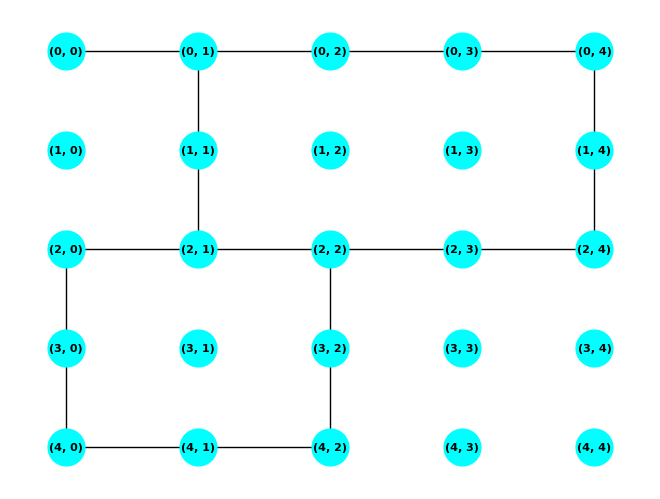

In [227]:
laberintoGrafica = dibujar_grafo_laberinto(laberintoBFS)

Procedemos a realizar la busqueda en anchura para encontrar la salida del laberinto. Esto partiendo desde nuestro vertice inicial (E o la posición del agente) y buscando el vertice final S (la salida del laberinto).

Una vez realizada la búsqueda, regresamos una nueva grafica en la que se muestre en rojo el camino mas corto entre el agente y la salida.

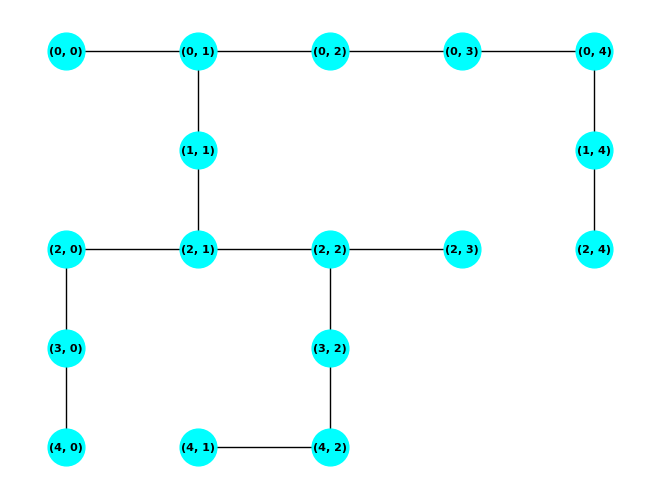

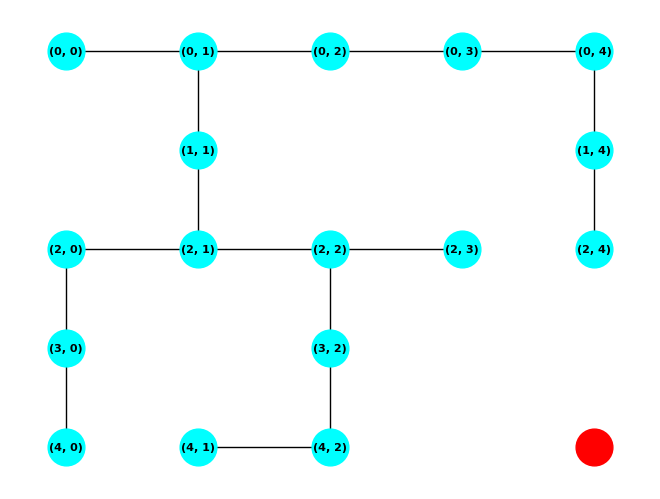

In [228]:
laberintoBSF = BFS(laberintoBFS, agenteP)

### 🖨️ **Imprimimos el Laberinto en su Forma Matricial Original**

In [229]:
# Imprimimos el laberinto original en su forma de matriz
print("\nLaberinto Original: ")
for lab in laberintoBFS:
    print(lab)


Laberinto Original: 
['E', 0, 0, 0, 0]
[1, 0, 1, 1, 0]
[0, 0, 0, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 0, 1, 'S']


### 👾 **Gift de la Búsqueda por Anchura**

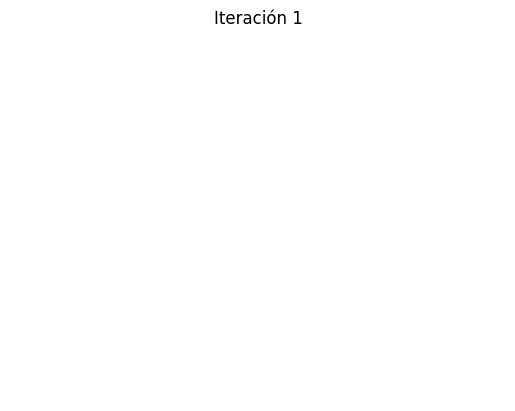

In [230]:
# import seaborn as sns

def crear_Grafica(camino):
    # Construir el grafo actual
    G_bfs = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_bfs.add_edge(nodo, padre)
            
    return G_bfs.copy()

def BFS_animation(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Algoritmo BFS
    inicioVertice = inicio
    finVertice = fin
    
    # Cola para almacenar los nodos que se van a visitar
    cola = [inicioVertice]
    # Conjunto para almacenar los nodos que ya se visitaron
    visitados = set()
    # Diccionario para almacenar el camino que se ha seguido para llegar a cada nodo
    camino = {inicioVertice: None}
    
    # Lista para almacenar los grafos en cada iteración
    grafos = []

    # Mientras la cola no está vacía
    while cola:
        # Sacar el primer nodo de la cola
        actual = cola.pop(0)
        # Si el nodo actual es el nodo final, terminar
        if actual == finVertice:
            break
        # Si el nodo actual no ha sido visitado
        if actual not in visitados:
            # Marcar el nodo actual como visitado
            visitados.add(actual)
            # Agregar los vecinos del nodo actual a la cola
            for vecino in G.neighbors(actual):
                if vecino not in visitados:
                    cola.append(vecino)
                    # Agregamos la grafica actual al gif de la representación del bfs
                    grafos.append(crear_Grafica(camino))
                    # Almacenar el camino que se ha seguido para llegar al vecino
                    camino[vecino] = actual
    
    # Agregamos la ultima grafica al gif de la representación del bfs
    grafos.append(crear_Grafica(camino))

    # Obtener la ruta más corta
    ruta_mas_corta = obtener_ruta_mas_corta(inicioVertice, finVertice, camino)
    #print("Ruta más corta:", ruta_mas_corta)

    return grafos, ruta_mas_corta

def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')


# Generar grafos y posición de nodos
grafos, ruta_mas_corta = BFS_animation(laberintoBFS, agenteP)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoBFS)) for columna in range(len(laberintoBFS[0]))}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())

### 📌 **Representación Gráfica de DFS**

Representación de la grafica asociada al laberinto, notese como es que todos los vertices asociados a los **1's** quedan desconectados de la grafica ya que no es posible moverse a través de ellos.

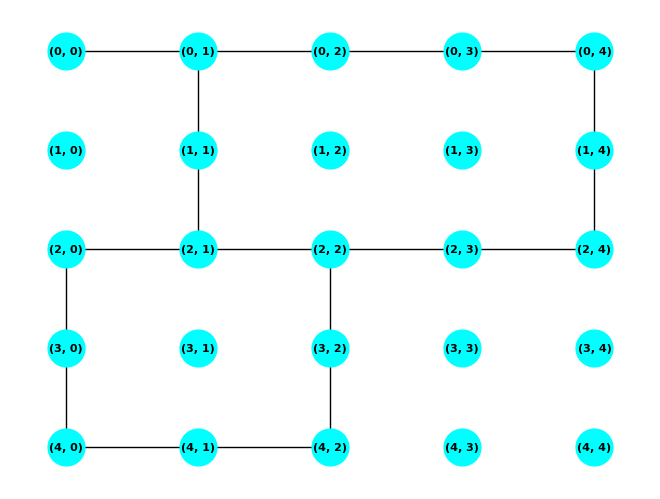

In [231]:
laberintoGrafica = dibujar_grafo_laberinto(laberintoDFS)

Procedemos a realizar la busqueda por profundidad para encontrar la salida del laberinto. Esto partiendo desde nuestro vertice inicial (E o la posición del agente) y buscando el vertice final S (la salida del laberinto).

Una vez realizada la búsqueda, regresamos una nueva grafica en la que se muestre en rojo el camino más corto entre el agente y la salida.

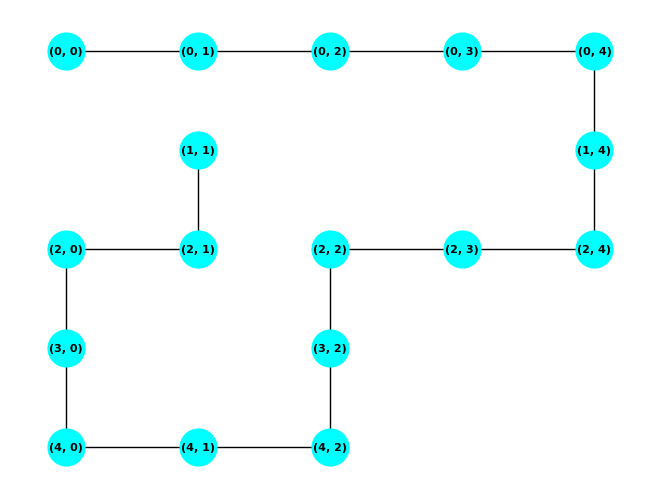

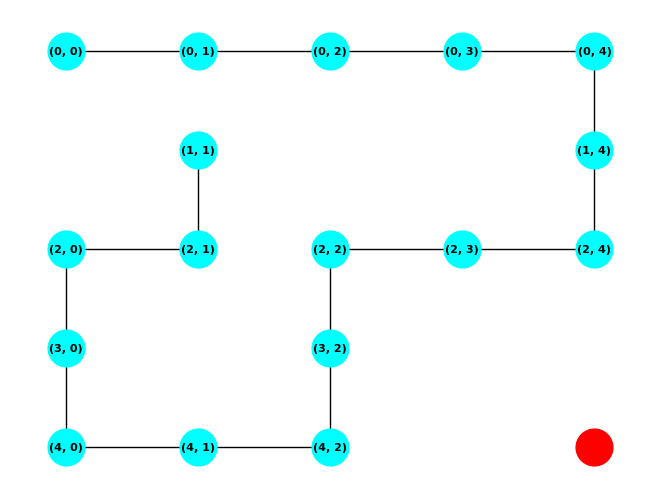

In [232]:
laberintoDSF = DFS(laberintoDFS, agenteP)

### 🖨️ **Imprimimos el Laberinto en su Forma Matricial Original**

In [ ]:
# Imprimimos el laberinto original en su forma de matriz
print("\nLaberinto Original: ")
for lab in laberintoDFS:
    print(lab)

### 👾 **Gift de la Búsqueda por Profundidad**

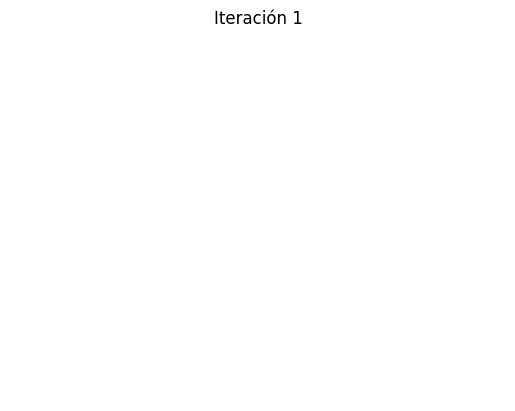

In [233]:
# import seaborn as sns

def crear_Grafica(camino):
    # Construir el grafo actual
    G_dfs = nx.Graph()
    for nodo, padre in camino.items():
        if padre is not None:
            G_dfs.add_edge(nodo, padre)
            
    return G_dfs.copy()

def DFS_animation(laberinto, agente):
    G = nx.Graph()

    # Vertice Inicial (E)
    laposicionxAGENTE = agente.posicion[0]
    laposicionyAGENTE = agente.posicion[1]

    inicio = (laposicionxAGENTE, laposicionyAGENTE)

    # Vertice Final (S)
    fin = doxeaLaS(laberinto)

    filas = len(laberinto)
    columnas = len(laberinto[0])

    # Crear nodos
    for fila in range(filas):
        for columna in range(columnas):
            if laberinto[fila][columna] == "E":
                inicio = (fila, columna)  # Establecer el vértice inicial
            elif laberinto[fila][columna] == "S":
                fin = (fila, columna)  # Establecer el vértice final
            # Agregar nodo con su posición como atributo
            G.add_node((fila, columna))

    # Crear aristas
    for fila in range(filas):
        for columna in range(columnas):
            # Verificar si la celda actual es un pasillo (0 o "E" o "S")
            if laberinto[fila][columna] == 0 or laberinto[fila][columna] == "E" or laberinto[fila][columna] == "S":
                # Agregar aristas a las celdas vecinas que también son pasillos
                if fila > 0 and laberinto[fila - 1][columna] == 0:
                    G.add_edge((fila, columna), (fila - 1, columna))
                if fila < filas - 1 and laberinto[fila + 1][columna] == 0:
                    G.add_edge((fila, columna), (fila + 1, columna))
                if columna > 0 and laberinto[fila][columna - 1] == 0:
                    G.add_edge((fila, columna), (fila, columna - 1))
                if columna < columnas - 1 and laberinto[fila][columna + 1] == 0:
                    G.add_edge((fila, columna), (fila, columna + 1))

    # Algoritmo DFS
    inicioVertice = inicio
    finVertice = fin
    
    # Cola para almacenar los nodos que se van a visitar
    pila = [inicioVertice]
    # Conjunto para almacenar los nodos que ya se visitaron
    visitados = set()
    # Diccionario para almacenar el camino que se ha seguido para llegar a cada nodo
    camino = {inicioVertice: None}
    
    # Lista para almacenar los grafos en cada iteración
    grafos = []


    # Mientras la pila no está vacía
    while pila:
        # Sacar el primer nodo de la pila
        nodo = pila.pop()
        # Si el nodo actual es el nodo final, terminar
        if nodo == fin:
            break
        # Si el nodo actual no ha sido visitado
        if nodo not in visitados:
            # Marcar el nodo actual como visitado
            visitados.add(nodo)
            # Agregar los vecinos del nodo actual a la pila
            for vecino in G.neighbors(nodo):
                if vecino not in visitados:
                    # Agregamos la grafica actual al gif de la representación del dfs
                    pila.append(vecino)
                    # Agregamos la grafica actual al gif de la representación del dfs
                    grafos.append(crear_Grafica(camino))
                    # Almacenar el camino que se ha seguido para llegar al vecino
                    camino[vecino] = nodo
    
    # Agregamos la ultima grafica al gif de la representación del dfs
    grafos.append(crear_Grafica(camino))

    # Obtener la ruta más corta
    ruta_mas_corta = obtener_ruta_mas_corta(inicioVertice, finVertice, camino)
    #print("Ruta más corta:", ruta_mas_corta)

    return grafos, ruta_mas_corta

def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')


# Generar grafos y posición de nodos
grafos, ruta_mas_corta = DFS_animation(laberintoDFS, agenteP)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoDFS)) for columna in range(len(laberintoDFS[0]))}

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())

### 📌 **Generador Aleatorio de Laberintos**

Modificar los parametros de filas y columnas para generar laberintos de diferentes tamaños.

In [234]:
# Dimensiones del laberinto
filas = 8
columnas = 8

In [235]:
import random
import copy 

# Crear el laberinto con todos los valores aleatorios
laberintoA = [[random.choice([0,1]) for _ in range(columnas)] for _ in range(filas)]

# Elegir una posición aleatoria para la entrada (E) y la salida (S)
entrada_fila, entrada_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)
salida_fila, salida_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)

# Asegurarse que la entrada y la salida no estén en la misma posición
while entrada_fila == salida_fila and entrada_columna == salida_columna:
    salida_fila, salida_columna = random.randint(0, filas - 1), random.randint(0, columnas - 1)

# Establecer la entrada (E) y la salida (S)
laberintoA[entrada_fila][entrada_columna] = 'E'
laberintoA[salida_fila][salida_columna] = 'S'

laberintoCopia = copy.deepcopy(laberintoA)

# Imprimir el laberinto
for fila in laberintoA:
    print(fila)

[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0]
['S', 1, 0, 1, 0, 0, 1, 1]
[0, 1, 'E', 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0]


In [236]:
# laberintoA[entrada_fila][entrada_columna] = 'E'
agenteA = Agente( [entrada_fila, entrada_columna] )

En caso de que al ejecutar no se muestren los pasos, es un alto indicativo de que no existe solucion para el laberinto generado.

In [237]:
algoritmoBRUTALISIMO = backtrack(agenteA, laberintoA)

Primer movimiento!	 Posición: [0, 0]
Movimiento: derecha	 Posición: [0, 1]
Movimiento: abajo	 Posición: [1, 1]
Movimiento: abajo	 Posición: [2, 1]
Movimiento: izquierda	 Posición: [2, 0]
Movimiento: abajo	 Posición: [3, 0]
Movimiento: abajo	 Posición: [4, 0]
Movimiento: derecha	 Posición: [4, 1]
Movimiento: derecha	 Posición: [4, 2]
Movimiento: arriba	 Posición: [3, 2]
Movimiento: arriba	 Posición: [2, 2]
Movimiento: derecha	 Posición: [2, 3]
Movimiento: derecha	 Posición: [2, 4]
Movimiento: abajo	 Posición: [3, 4]
Movimiento: abajo	 Posición: [4, 4]
Movimiento: abajo	 Posición: [6, 2]
Movimiento: abajo	 Posición: [7, 2]
Movimiento: izquierda	 Posición: [7, 1]
Movimiento: arriba	 Posición: [6, 1]
Movimiento: izquierda	 Posición: [6, 0]
Movimiento: arriba	 Posición: [5, 0]
Movimiento: arriba	 Posición: [4, 0]
Encontré la salida :D



In [238]:
# Imprimir trayecto y eventos en el laberinto
print("Representacion grafica de los pasos seguidos por el agente para la solucion final: \n")
print("■ = Obstaculos (los 1's)")
print("O = Celda Libre")
print("S = Salida\n")

for lab in laberintoA:
    print('[', end='')
    for path in lab:
        if path == 1:
            path = '■'
        if path == 0:
            path = 'O'
        print(f" {path}", end='')
    print(" ]")

Representacion grafica de los pasos seguidos por el agente para la solucion final: 

■ = Obstaculos (los 1's)
O = Celda Libre
S = Salida

[ O O O O O O O O ]
[ ■ ■ ■ O O O O O ]
[ O O ■ O O ■ O ■ ]
[ O ■ ■ O ■ ■ O O ]
[ S ■ O ■ O O ■ ■ ]
[ ↑ ■ ↓ O O O ■ ■ ]
[ ↑ ← ↓ O O ■ O ■ ]
[ O ↑ ← O ■ O O O ]


# Graficamos el laberinto aleatorio generado

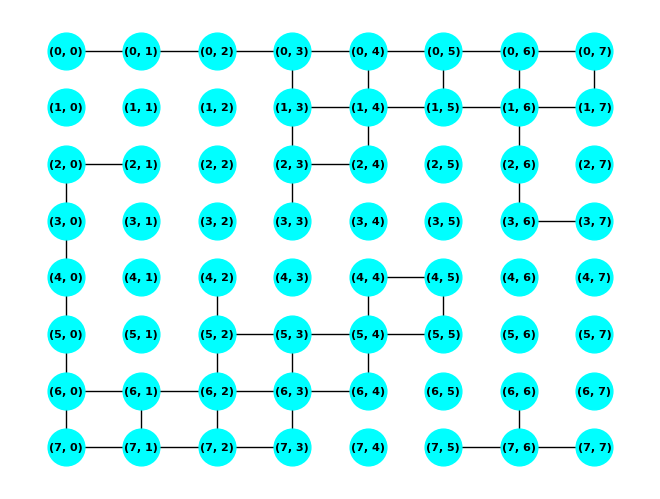

In [239]:
# Version grafica de la representacion del laberinto
laberintoGrafica = dibujar_grafo_laberinto(laberintoCopia)

# Ejecutamos BFS en el laberinto aleatorio

En caso de que no se muestre el camino en rojo desde la entrada hasta la salida es un indicativo de que no existe solucion para el laberinto generado.

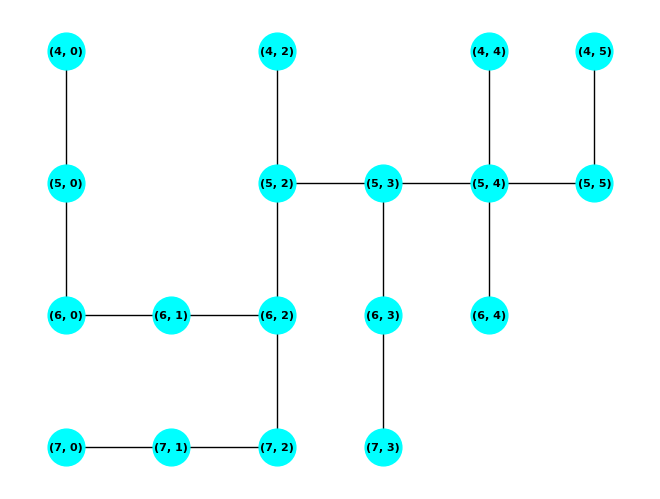

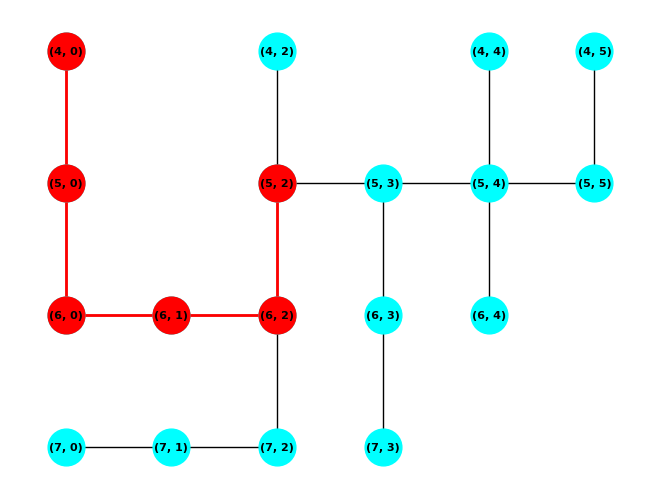

In [240]:
BFS(laberintoCopia, agenteA)

# Gif Sobre la ejecución de BFS en el laberinto aleatorio

(Siempre y cuando exista solución)

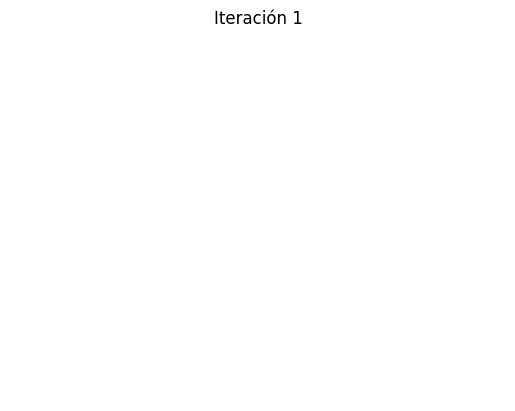

In [242]:
#DFS_animation(laberintoCopia, agenteA)
def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')

# Generar grafos y posición de nodos
grafos, ruta_mas_corta  = BFS_animation(laberintoCopia, agenteA)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoCopia)) for columna in range(len(laberintoCopia[0]))}

# Crear la figura y los jes
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())

# Ejecutamos DFS en el laberinto aleatorio

En caso de que no se muestre el camino en rojo desde la entrada hasta la salida es un indicativo de que no existe solucion para el laberinto generado.

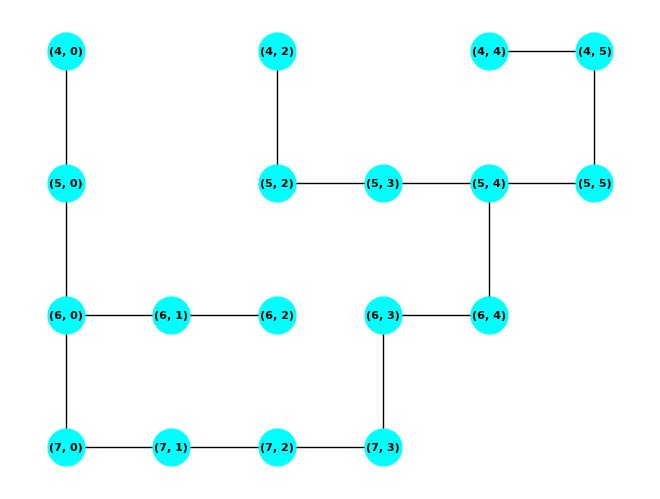

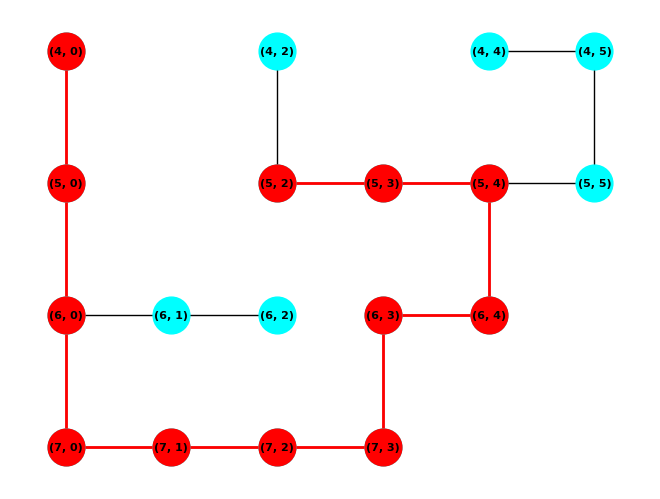

In [241]:
DFS(laberintoCopia, agenteA)

# Gif Sobre la ejecución de DFS en el laberinto aleatorio

(Siempre y cuando exista solución)

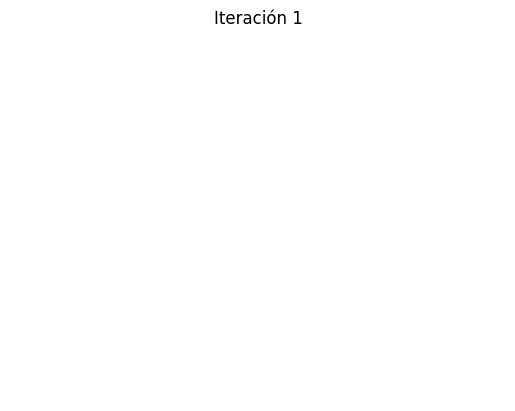

In [243]:
#DFS_animation(laberintoCopia, agenteA)
def update(frame):
    ax.clear()
    nx.draw(grafos[frame], pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.title(f'Iteración {frame+1}')

# Generar grafos y posición de nodos
grafos, ruta_mas_corta  = DFS_animation(laberintoCopia, agenteA)
pos = {(fila, columna): (columna, -fila) for fila in range(len(laberintoCopia)) for columna in range(len(laberintoCopia[0]))}

# Crear la figura
fig, ax = plt.subplots()

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(grafos), interval=1000, repeat=True)

# Configurar el formato de renderizado predeterminado como HTML5
plt.rcParams['animation.html'] = 'html5'

# Visualizar la animación en el notebook
HTML(ani.to_jshtml())

# 📌 **Conclusión**

Con todo lo mostrado, podemos observar que las soluciones para el laberinto aleatorio son muy variadas, ya que dependen de la generación aleatoria del laberinto. En algunos casos, el laberinto no tiene solución, sin embargo aquellos que si la tienen, no tienen una forma definitiva para resolverlos, existen unas mas optimas que otras, por ejemplo el que **backtracking** sea mas **ineficiente** en encontrar (y brindar) una solución, mientras que al modelar el laberinto como una grafica, y usar un algoritmo de busqueda como **BFS** o **DFS**, se puede encontrar (y brindar) una solución de manera mas **eficiente**, esto ultimo dependiendo de la forma del laberinto ya que dependiendo de esta, uno de los dos algoritmos puede ser mas eficiente que el otro.


<div style="text-align: center"> 

[![](https://media.tenor.com/qJRMLPlR3_8AAAAi/maxwell-cat.gif)](https://www.youtube.com/watch?v=YRvOePz2OqQ)

</div>
